## Suppose we want to identify if a molecule is toxic or non-toxic

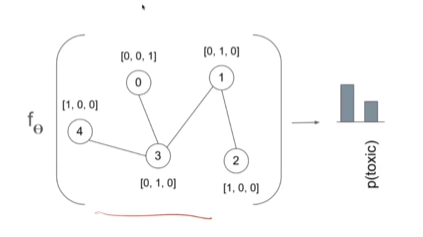
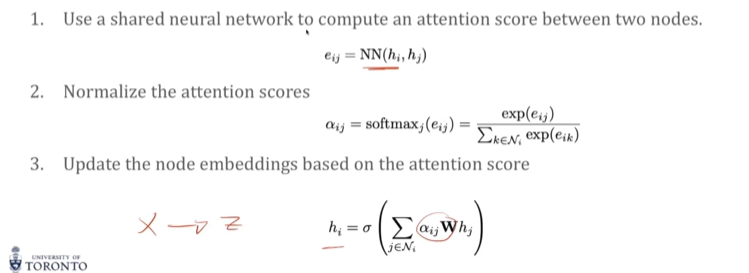

Carbon --> [1 0 0]

Hydrogen --> [0 1 0]

Nitrogen --> [0 0 1]

### Dense Implementation 
We have a dense adjacency matrix here. The matrix is intuitive to build. 



In [ ]:
class DenseGCN(nn.Module):
    def __init__(self):
        super(DenseGNN, self).__init__() 
        self.fc1 = nn.Linear(3, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, A, x):
        A = A + torch.eye(A.shape[0])
        D = torch.diag(torch.sum(A, dim=0)) # Just diagonalizing 
        D = torch.pow(D, -0.5)
        A = torch.mm(torch.mm(D, A), D)
        x = torch.mm(A, x) # 
        x = F.relu(self.fc1(x))
        x = torch.mm(A, x) # Second set of message passing 
        x = F.relu(self, fc2(x))

        g = torch.sum(x, dim=0) # readout aggregation
        y = torch.Sigmoid(self.fc3(g)) # classifier 
        return y 


## Sparse Implementation 
Note that most graphs of SPARSE! DEnse implementations use $N^2$ space for adjacency. 

We can represent this graph with only 4 edges where dense implementatino represents it with 25

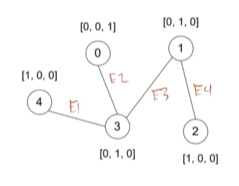

You don't even need 25 edges here! We should compact this and make it more memory efficient!

## PyTorch Geometric (PYG)

Top row: The numbering of the ndoes 

Bottom Row: Connection

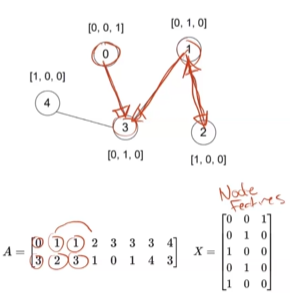

The storage is just 

$$ 
2 \times \text{Number of edges} \times 2 \text{(Bidirectional)}
$$

In [ ]:
import torch 
from torch_geometric.data import Data 
import torch.nn.functional as F 
from torch_geometric.nnn import GCNConv

edge_index = torch.tensor([[0, 1, 1, 2, 3, 3, 3, 4], 
                            [3, 2, 3, 1, 0, 1, 4, 3],
                            ])

x = torch.tensor([[0, 0, 1],
                    [0, 1, 0], 
                    [1, 0, 0], 
                    [0, 1, 0], 
                    [1, 0, 0]
                    ], dtype=torch.float)

data = Data(x=x, edge_index=edge_index, y=[1.0])

# y is the ground truth 

class SparseGCN(nn.Module):
    def __init__(self):
        super(SparseGCN, self).__init__() 
        self.gcn1 = nn.GCNConv(3, 32)
        self.gcn2 = nn.GCNConv(32, 64)
        self.fc = nn.Linear(64, 1)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))
        g = torch.sum(x, dim=0)
        y = torch.Sigmoid(self.fc(g))
        return y

## DataLoader and Datasets

**Dense Implementation:** Batching is done by creating a DIAGONAL MATRIX of adjacency matrices

**Sparse Implementation:** Uses an index (bookkeeping) vector which maps each ndoe to its respective graph in the batch. 

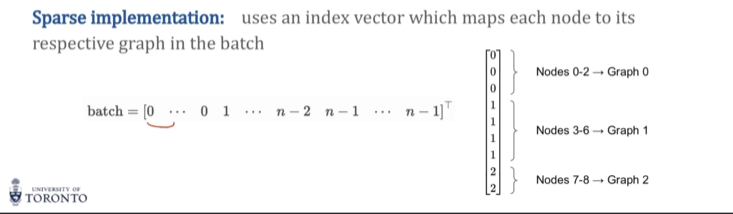

So it'd be 

[0, 0, ....., 1, 1, ....., n-2 n-1 ... n-1]

In [ ]:
from torch_geomtric.datasets import TUDataset 
from torch_geometric.loader import DataLoader 

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for data in loader: 
    print(data)
    break 

    output >>> DataBatch(batch=[1082], edge_index=[2,4066], x=[1082, 21], y=[32])

## Training 

EXACT SAME PROCEDURE!
